## Day 3: Crossed Wires

### Part one

The gravity assist was successful, and you're well on your way to the Venus refuelling station. During the rush back on Earth, the fuel management system wasn't completely installed, so that's next on the priority list.

Opening the front panel reveals a jumble of wires. Specifically, two wires are connected to a central port and extend outward on a grid. You trace the path each wire takes as it leaves the central port, one wire per line of text (your puzzle input).

The wires twist and turn, but the two wires occasionally cross paths. To fix the circuit, you need to find the intersection point closest to the central port. Because the wires are on a grid, use the Manhattan distance for this measurement. While the wires do technically cross right at the central port where they both start, this point does not count, nor does a wire count as crossing with itself.

For example, if the first wire's path is R8,U5,L5,D3, then starting from the central port (o), it goes right 8, up 5, left 5, and finally down 3:

`...........`     
`...........`     
`...........`  
`....+----+.`    
`....|....|.`  
`....|....|.`  
`....|....|.`  
`.........|.`  
`.o-------+.`  
`...........`  

Then, if the second wire's path is U7,R6,D4,L4, it goes up 7, right 6, down 4, and left 4:

`...........`<br>
`.+-----+...`<br>
`.|.....|...`<br>
`.|..+--X-+.`<br>
`.|..|..|.|.`<br>
`.|.-X--+.|.`<br>
`.|..|....|.`<br>
`.|.......|.`<br>
`.o-------+.`<br>
`...........`<br>

These wires cross at two locations (marked X), but the lower-left one is closer to the central port: its distance is 3 + 3 = 6.

Here are a few more examples:

- R75,D30,R83,U83,L12,D49,R71,U7,L72  
  U62,R66,U55,R34,D71,R55,D58,R83 = distance 159
- R98,U47,R26,D63,R33,U87,L62,D20,R33,U53,R51  
  U98,R91,D20,R16,D67,R40,U7,R15,U6,R7 = distance 135

**What is the Manhattan distance from the central port to the closest intersection?**

In [186]:
import re

# reading txt files
with open("day3.txt","r") as f:
    wires = f.read()
# convert data into a list, and separate keyword and digits using regular expression
wires = wires.split('\n')
def data_conversion(wires):
    for i,w in enumerate(wires):
        wires[i] = re.findall('([A-Z]{1,1})(\d+)',w)
    return wires

wires = data_conversion(wires)
# print(wires)

In [187]:
def find_intersects(wires):
    # define variables
    points_w1_w2={"w1":[],"w2":[]}
    intersects=[]
    # loop through all the commands
    for i,w in enumerate(wires):
        key = "w1" if i == 0 else "w2"
        x=0
        y=0
        points = []
        for c in w:
            keyword = c[0]
            digits = c[1]
            # determine the keyword and what the action will be, used for eval() to evaluate the mathematical expression
            if keyword == "R":
                action = "x+"
            elif keyword == "L":
                action = "x-"
            elif keyword == "U":
                action = "y+"
            else:
                action = "y-"
            # loop through digits and record all the datapoints it passed
            for i in range(1,int(digits)+1):
                if "x" in action:
                    x = eval(action+str(1))
                elif "y" in action:
                    y = eval(action+str(1))
                points.append([x,y])
        points_w1_w2[key] = points

    # after find all the point in wire1 and wire2, now we move on to find the intersections
    points_w1 = set(tuple(i) for i in points_w1_w2["w1"])
    points_w2 = set(tuple(i) for i in points_w1_w2["w2"])
    intersects = list(points_w1.intersection(points_w2))
    return intersects
    

In [220]:
#find Manhattan distance for each intersect and return the smallest one
def Manhattan_distance(lst):
    d = []
    for i,item in enumerate(lst):
        d.append(abs(item[0])+abs(item[1]))
    return min(d)

In [224]:
def part1(data):
    lst = find_intersects(data)
#     print(lst)
    return Manhattan_distance(lst)

#### the answer for part 1

In [225]:
part1(wires)

1983

#### visualization and a different way to code

In [190]:
# to visualize
def find_coordinates(wire):
    x=0
    y=0
    points = []
    for c in wire:
        keyword = c[0]
        digits = int(c[1])
        if keyword == "R":
            # loop through digits and record all the datapoints it passed
            for d in range(1,digits+1):
                x = x + 1
                points.append([x,y])
        elif keyword == "L":
            for d in range(1,digits+1):
                x = x - 1
                points.append([x,y])
        elif keyword == "U":
            for d in range(1,digits+1):
                y = y + 1
                points.append([x,y])
        else:
            for d in range(1,digits+1):
                y = y - 1
                points.append([x,y])
        
    return points

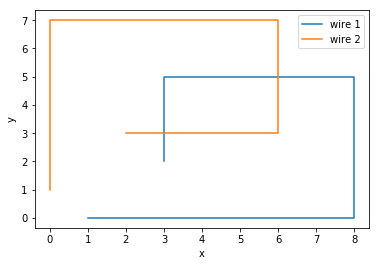

In [249]:
# testing
test = data_conversion(["R8,U5,L5,D3","U7,R6,D4,L4"])
points_1 = find_coordinates(test[0])
points_2 = find_coordinates(test[1])
# print(points_1)
# print(*points_1)
points_1_set = set(tuple(i) for i in points_1)
points_2_set = set(tuple(i) for i in points_2)
intersects_test = list(points_1_set.intersection(points_2_set))
import matplotlib.pyplot as plt
x1, y1 = zip(*points_1)
x2, y2 = zip(*points_2)
plt.plot(x1,y1,label="wire 1")
plt.plot(x2,y2,label="wire 2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

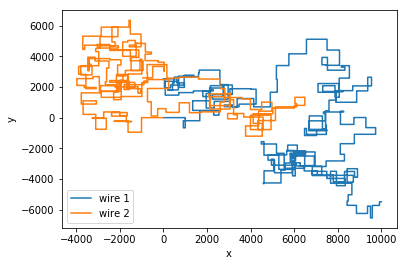

In [217]:
# real data ing...
points_w1 = find_coordinates(wires[0])
points_w2 = find_coordinates(wires[1])
# print(points_1)
# print(*points_1)
import matplotlib.pyplot as plt
x_w1, y_w1 = zip(*points_w1)
x_w2, y_w2 = zip(*points_w2)
plt.plot(x_w1,y_w1,label="wire 1")
plt.plot(x_w2,y_w2,label="wire 2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

In [234]:
# after find all the point in wire1 and wire2, now we move on to find the intersections
points_w1_set = set(tuple(i) for i in points_w1)
points_w2_set = set(tuple(i) for i in points_w2)
intersects = list(points_w1_set.intersection(points_w2_set))
Manhattan_distance(intersects)

1983

### Part Two
It turns out that this circuit is very timing-sensitive; you actually need to minimize the signal delay.

To do this, calculate the number of steps each wire takes to reach each intersection; choose the intersection where the sum of both wires' steps is lowest. If a wire visits a position on the grid multiple times, use the steps value from the first time it visits that position when calculating the total value of a specific intersection.

The number of steps a wire takes is the total number of grid squares the wire has entered to get to that location, including the intersection being considered. Again consider the example from above:

`...........`  
`.+-----+...`  
`.|.....|...`  
`.|..+--X-+.`  
`.|..|..|.|.`  
`.|.-X--+.|.`  
`.|..|....|.`  
`.|.......|.`  
`.o-------+.`  
`...........`  
In the above example, the intersection closest to the central port is reached after 8+5+5+2 = 20 steps by the first wire and 7+6+4+3 = 20 steps by the second wire for a total of 20+20 = 40 steps.

However, the top-right intersection is better: the first wire takes only 8+5+2 = 15 and the second wire takes only 7+6+2 = 15, a total of 15+15 = 30 steps.

Here are the best steps for the extra examples from above:

R75,D30,R83,U83,L12,D49,R71,U7,L72  
U62,R66,U55,R34,D71,R55,D58,R83 = 610 steps  
R98,U47,R26,D63,R33,U87,L62,D20,R33,U53,R51  
U98,R91,D20,R16,D67,R40,U7,R15,U6,R7 = 410 steps  
**What is the fewest combined steps the wires must take to reach an intersection?**

In [252]:
def find_min_steps(points_1,points_2,intersects):
    steps_sum=[]
    for intersect in intersects:
        step1 = 1
        step2 = 1
        step1 += points_1.index(list(intersect))
        step2 += points_2.index(list(intersect))

        step_sum = step1+step2
        steps_sum.append(step_sum)
    return min(steps_sum)

In [254]:
find_min_steps(points_1,points_2,intersects_test)

30

In [255]:
find_min_steps(points_w1,points_w2,intersects)

107754